In [ ]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import time


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Sir Qasim Project/dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288065 entries, 0 to 288064
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   package_name  288065 non-null  object
 1   review        288065 non-null  object
 2   date          288065 non-null  object
 3   star          288065 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 8.8+ MB


In [ ]:
df = df.head(50000)

In [ ]:
import numpy as np

In [ ]:

from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['star'] = labelencoder.fit_transform(df['star'])

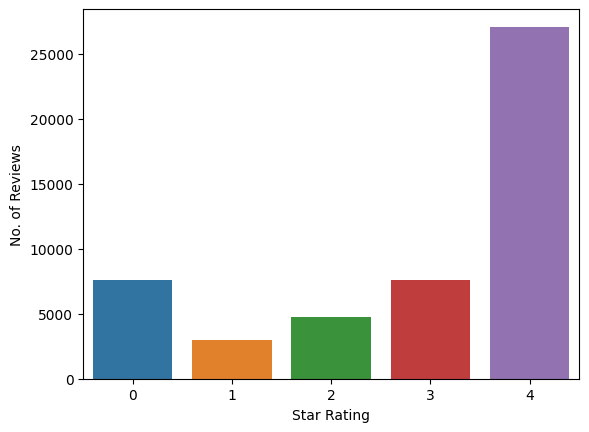

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
sns.countplot(x='star', data=df)

# Adding x and y titles
plt.xlabel('Star Rating')
plt.ylabel('No. of Reviews')

plt.show()


In [ ]:
# import nltk
# from nltk.corpus import sentiwordnet as swn
# from nltk.tokenize import word_tokenize
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('sentiwordnet')

In [ ]:
# # Create a new column to store the sentiment scores
# df['swn_score'] = 0

# # Iterate over each row
# for index, row in df.iterrows():
#     # Tokenize the review text
#     tokens = word_tokenize(row['review'])
#     print("itearation")
#     # Initialize variables to store the total positive and negative scores
#     pos_score = 0
#     neg_score = 0

#     # Calculate the sentiment scores for each token
#     for token in tokens:
#         synsets = swn.senti_synsets(token)
#         for synset in synsets:
#             pos_score += synset.pos_score()
#             neg_score += synset.neg_score()

#     # Calculate the overall sentiment score by subtracting the negative score from the positive score
#     sentiment_score = pos_score - neg_score

#     # Update the sentiment score in the DataFrame
#     df.at[index, 'swn_score'] = sentiment_score


In [ ]:
# df['swn_score']

In [ ]:
# import pandas as pd

# # Assuming you have an updated DataFrame named 'df' with modifications

# # Save the updated DataFrame to a CSV file
# df.to_csv('/content/drive/MyDrive/Sir Qasim Project/swn_df.csv', index=False)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Sir Qasim Project/swn_df.csv')

In [ ]:
pip install transformers

In [ ]:
import torch
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
from torch.utils.data import RandomSampler
from torch.utils.data import DataLoader


In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

# max_len_train = 0

# # For every sentence...
# for sent in df['review']:

#     # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
#     input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

#     # Update the maximum sentence length.
#     max_len_train = max(max_len_train, len(input_ids))

# print('Max sentence length: ', max_len_train)

In [ ]:
# Define the hyperparameters
learning_rate = 2e-5
batch_size = 16
epochs = 10
num_labels = 5
attention_heads = 12
gradient_accumulation_steps = 16
hidden_size = 768
hidden_layers = 12
max_seq_length = 402
num_params = 110_000_000



In [ ]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize the input data using the BERT tokenizer for the training set
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
train_input_ids = []
train_attention_masks = []
for _, row in train_df.iterrows():
    sentence = row['review']
    additional_column = str(row['swn_score'])  # Convert the additional column value to a string
    encoded_dict = tokenizer.encode_plus(
                        sentence,
                        additional_column,  # Include the additional column in the encoding process
                        add_special_tokens=True,
                        max_length=max_seq_length,
                        pad_to_max_length=True,
                        return_attention_mask=True,
                        return_tensors='pt'
                   )
    print("iteration")
    train_input_ids.append(encoded_dict['input_ids'])
    train_attention_masks.append(encoded_dict['attention_mask'])
train_input_ids = torch.cat(train_input_ids, dim=0)
train_attention_masks = torch.cat(train_attention_masks, dim=0)

# Convert labels to a 1D numpy array for the training set
train_labels = np.array(train_df['star'])
# Convert labels to a tensor for the training set
train_labels = torch.tensor(train_labels)



Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.



iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.



iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.



iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.



iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.



iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration

In [ ]:
# unique_labels = torch.unique(train_labels)
# label_counts = torch.bincount(train_labels)
# for label in unique_labels:
#     count = label_counts[label]
#     print(f"Label {label}: {count} occurrences")



In [ ]:
# with open("/content/drive/MyDrive/Sir Qasim Project/train_input_idsswn.pickle", "wb") as scores:
#     pickle.dump(train_input_ids, scores)
# with open("/content/drive/MyDrive/Sir Qasim Project/train_attention_masksswn.pickle", "wb") as scores:
#     pickle.dump(train_attention_masks, scores)
# with open("/content/drive/MyDrive/Sir Qasim Project/train_labelsswn.pickle", "wb") as scores:
#     pickle.dump(train_labels, scores)

In [ ]:
# with open("/content/drive/MyDrive/Sir Qasim Project/train_input_idsswn.pickle", "rb") as scores:
#    train_input_ids = pickle.load(scores)

# with open("/content/drive/MyDrive/Sir Qasim Project/train_attention_masksswn.pickle", "rb") as scores:
#    train_attention_masks= pickle.load(scores)

# with open("/content/drive/MyDrive/Sir Qasim Project/train_labelsswn.pickle", "rb") as scores:
#    train_labels = pickle.load(scores)

In [ ]:
print(train_input_ids.shape)
print(train_attention_masks.shape)
print(train_labels.shape)

In [ ]:

# Create the training dataset and data loader
train_dataset = TensorDataset(train_input_ids, train_attention_masks, train_labels)
print(train_dataset)
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=batch_size)

In [ ]:
# Tokenize the input data using the BERT tokenizer for testing set
from torch.utils.data import SequentialSampler


In [ ]:
test_input_ids = []
test_attention_masks = []
for _, row in test_df.iterrows():
    sentence = row['review']
    additional_column = str(row['swn_score'])  # Convert the additional column value to a string
    encoded_dict = tokenizer.encode_plus(
                        sentence,
                        additional_column,  # Include the additional column in the encoding process
                        add_special_tokens=True,
                        max_length=max_seq_length,
                        pad_to_max_length=True,
                        return_attention_mask=True,
                        return_tensors='pt'
                   )
    test_input_ids.append(encoded_dict['input_ids'])
    test_attention_masks.append(encoded_dict['attention_mask'])
test_input_ids = torch.cat(test_input_ids, dim=0)
test_attention_masks = torch.cat(test_attention_masks, dim=0)

# Convert labels to a 1D numpy array for the training set
test_labels = np.array(test_df['star'])
# Convert labels to a tensor for the training set
test_labels = torch.tensor(test_labels)

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


In [ ]:

# with open("/content/drive/MyDrive/Sir Qasim Project/test_input_idsswn.pickle", "wb") as scores:
#     pickle.dump(test_input_ids, scores)
# with open("/content/drive/MyDrive/Sir Qasim Project/test_attention_masksswn.pickle", "wb") as scores:
#     pickle.dump(test_attention_masks, scores)
# with open("/content/drive/MyDrive/Sir Qasim Project/test_labelsswn.pickle", "wb") as scores:
#     pickle.dump(test_labels, scores)

In [ ]:
# with open("/content/drive/MyDrive/Sir Qasim Project/test_input_idsswn.pickle", "rb") as scores:
#    test_input_ids = pickle.load(scores)

# with open("/content/drive/MyDrive/Sir Qasim Project/test_attention_masksswn.pickle", "rb") as scores:
#    test_attention_masks = pickle.load(scores)
# with open("/content/drive/MyDrive/Sir Qasim Project/test_labelsswn.pickle", "rb") as scores:
#   test_labels = pickle.load(scores)

In [ ]:
print(test_input_ids.shape)
print(test_attention_masks.shape)
print(test_labels.shape)

In [ ]:
# Create the testing dataset and data loader
test_dataset = TensorDataset(test_input_ids, test_attention_masks, test_labels)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=batch_size)


In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import RandomSampler
from torch.utils.data import DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from transformers.optimization import get_linear_schedule_with_warmup


In [ ]:
val_input_ids = []
val_attention_masks = []
for _, row in df.iterrows():
    sentence = row['review']
    additional_column = str(row['swn_score'])  # Convert the additional column value to a string
    encoded_dict = tokenizer.encode_plus(
                        sentence,
                        additional_column,  # Include the additional column in the encoding process
                        add_special_tokens=True,
                        max_length=max_seq_length,
                        pad_to_max_length=True,
                        return_attention_mask=True,
                        return_tensors='pt'
                   )
    val_input_ids.append(encoded_dict['input_ids'])
    val_attention_masks.append(encoded_dict['attention_mask'])
val_input_ids = torch.cat(val_input_ids, dim=0)
val_attention_masks = torch.cat(val_attention_masks, dim=0)

# Convert labels to a 1D numpy array for the training set
val_labels = np.array(df['star'])
# Convert labels to a tensor for the training set
val_labels = torch.tensor(val_labels)

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

In [ ]:
# with open("/content/drive/MyDrive/Sir Qasim Project/val_input_idsswn.pickle", "wb") as scores:
#     pickle.dump(val_input_ids, scores)
# with open("/content/drive/MyDrive/Sir Qasim Project/val_attention_masksswn.pickle", "wb") as scores:
#     pickle.dump(val_attention_masks, scores)
# with open("/content/drive/MyDrive/Sir Qasim Project/val_labelsswn.pickle", "wb") as scores:
#     pickle.dump(val_labels, scores)

In [ ]:
# with open("/content/drive/MyDrive/Sir Qasim Project/val_input_idsswn.pickle", "rb") as scores:
#    val_input_ids = pickle.load(scores)
# with open("/content/drive/MyDrive/Sir Qasim Project/val_attention_masksswn.pickle", "rb") as scores:
#    val_attention_masks = pickle.load(scores)
# with open("/content/drive/MyDrive/Sir Qasim Project/val_labelsswn.pickle", "rb") as scores:
#   val_labels = pickle.load(scores)

In [ ]:
print(val_input_ids.shape)
print(val_attention_masks.shape)
print(val_labels.shape)

In [ ]:
# Create the validation dataset and data loader
val_dataset = TensorDataset(val_input_ids, val_attention_masks, val_labels)
val_sampler = SequentialSampler(val_dataset)
val_dataloader = DataLoader(val_dataset, sampler=val_sampler, batch_size=batch_size)

In [ ]:
import torch.nn as nn


In [ ]:
# Load the pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)

# Move the model to the GPU (if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define the optimizer and the learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader)*epochs)

# Set the number of epochs, the training and validation steps, and the loss function
epochs = 10
total_steps = len(train_dataloader) * epochs
train_steps = len(train_dataloader)
eval_steps = len(val_dataloader)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
x = list(range(1, epochs+1))
losses = []  # Track loss values
accuracies = []  # Track accuracy values
# Initialize the timer for training
start_time = time.time()
# Train the model
model.train()
for epoch in range(epochs):
    epoch_loss = 0
    epoch_correct = 0
    for step, batch in enumerate(train_dataloader):
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        model.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        epoch_loss += loss.item()
        epoch_correct += torch.sum(torch.argmax(logits, dim=1) == labels)

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        if (step + 1) % train_steps == 0:
            epoch_loss /= train_steps
            epoch_acc = epoch_correct / (train_steps * batch_size)
            print(f'Epoch [{epoch+1}/{epochs}], Step [{step+1}/{train_steps}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
            # Calculate epoch loss and accuracy
            epoch_loss /= train_steps
            epoch_acc = epoch_correct / (train_steps * batch_size)

            # Store the metric values
            losses.append(epoch_loss)
            accuracies.append(epoch_acc)
            epoch_loss = 0
            epoch_correct = 0

# Calculate the training time
training_time = time.time() - start_time

# Print the training time
print("Training Time: {:.4f} seconds".format(training_time))

Epoch [1/10], Step [250/250], Loss: 1.1217, Accuracy: 0.5838
Epoch [2/10], Step [250/250], Loss: 0.8465, Accuracy: 0.6870
Epoch [3/10], Step [250/250], Loss: 0.6675, Accuracy: 0.7515
Epoch [4/10], Step [250/250], Loss: 0.5013, Accuracy: 0.8225
Epoch [5/10], Step [250/250], Loss: 0.3746, Accuracy: 0.8760
Epoch [6/10], Step [250/250], Loss: 0.2788, Accuracy: 0.9125
Epoch [7/10], Step [250/250], Loss: 0.2225, Accuracy: 0.9275
Epoch [8/10], Step [250/250], Loss: 0.1529, Accuracy: 0.9550
Epoch [9/10], Step [250/250], Loss: 0.1382, Accuracy: 0.9568
Epoch [10/10], Step [250/250], Loss: 0.1066, Accuracy: 0.9690
Training Time: 1675.4869 seconds


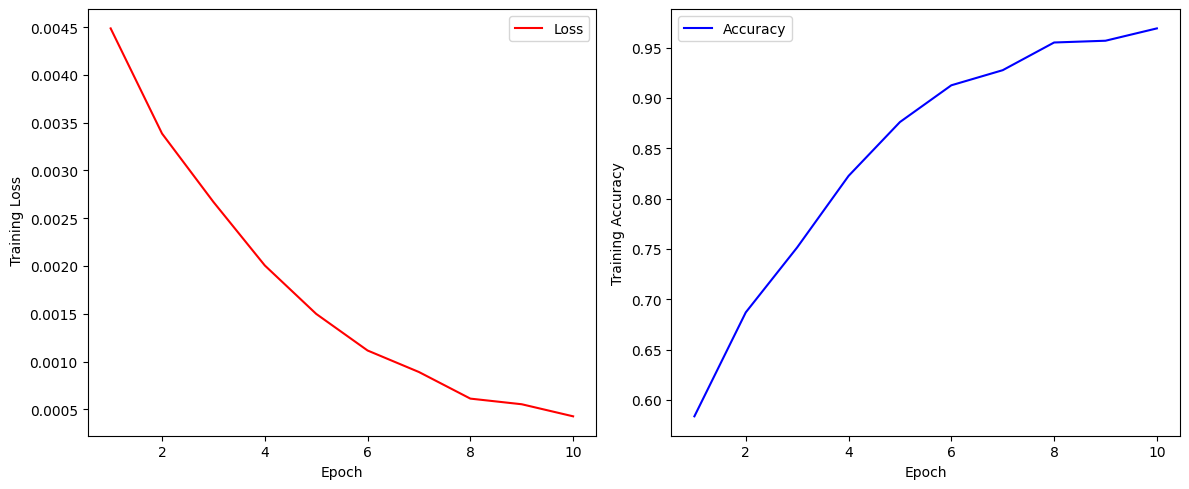

In [ ]:
# Initialize the figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
# Update the plots
ax[0].plot(x[:len(losses)], losses,  color="red", label="Loss")
ax[1].plot(x[:len(accuracies)], [acc.cpu().detach().item() for acc in accuracies],  color="blue", label="Accuracy")


# Set plot labels and titles
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel(" Training Loss")
# ax[0].set_title("Training Loss")
ax[0].legend()

ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Training Accuracy")
# ax[1].set_title("Training Accuracy")
ax[1].legend()

# Display the plots
plt.tight_layout()
plt.show()


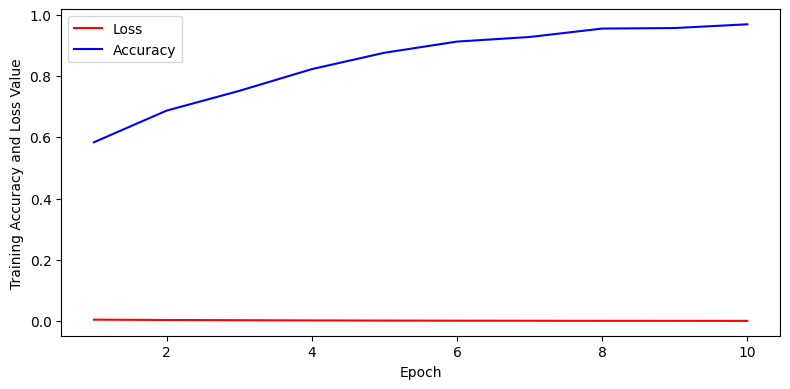

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have two lists 'losses' and 'accuracies' containing the loss and accuracy values, respectively.

x = range(1, len(losses) + 1)  # Assuming 'x' represents the epochs

# Initialize the figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

# Update the plots
ax.plot(x[:len(losses)], losses,  color="red", label="Loss")
ax.plot(x[:len(accuracies)], [acc.cpu().detach().item() for acc in accuracies],  color="blue", label="Accuracy")

# Set plot labels and titles
ax.set_xlabel("Epoch")
ax.set_ylabel("Training Accuracy and Loss Value")
# ax.set_title("Training Loss and Accuracy")

# Add a legend to differentiate loss and accuracy lines
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Evaluate the model on the test dataset
model.eval()
predictions = []
true_labels = []
eval_loss = 0
eval_correct = 0


In [ ]:
import matplotlib.pyplot as plt

# Initialize lists to store accuracy and loss values
iteration_accuracy = []
iteration_loss = []

# Evaluate the model on the test dataset
model.eval()
predictions = []
true_labels = []
eval_loss = 0
eval_correct = 0
# Initialize the timer for testing
start_time = time.time()

# Evaluation of Model
with torch.no_grad():
    for batch in val_dataloader:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        eval_loss += loss.item()
        eval_correct += torch.sum(torch.argmax(logits, dim=1) == labels)

        predictions.extend(torch.argmax(logits, dim=1).tolist())
        true_labels.extend(labels.tolist())

        # Store accuracy and loss values
        iteration_accuracy.append(accuracy_score(true_labels, predictions))
        iteration_loss.append(eval_loss / (step + 1))

# Calculate the testing time
testing_time = time.time() - start_time

# Compute the accuracy, precision, recall, and F1 score
acc = accuracy_score(true_labels, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')

# Print the testing time
print("Testing Time: {:.2f} seconds".format(testing_time))


Testing Time: 74.04 seconds


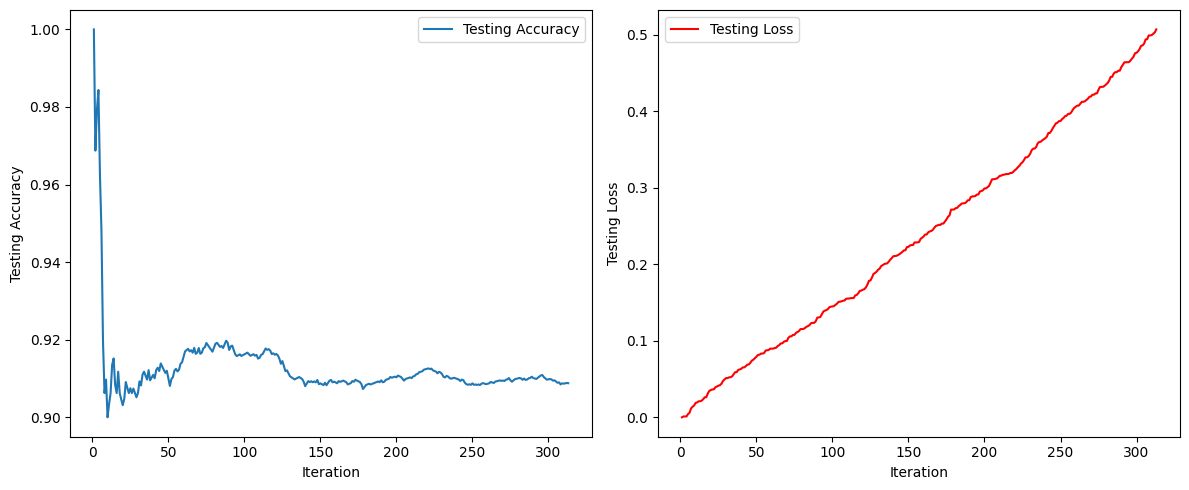

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have two lists 'iteration_accuracy' and 'iteration_loss' containing the accuracy and loss values on each iteration, respectively.

iterations = range(1, len(iteration_accuracy) + 1)

# Initialize the figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Update the accuracy subplot
line_accuracy, = ax[0].plot(iterations, iteration_accuracy, label='Testing Accuracy')
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("Testing Accuracy")
# ax[0].set_title("Testing Accuracy on Each Iteration")

# Update the loss subplot
line_loss, = ax[1].plot(iterations, iteration_loss, color='red', label='Testing Loss')
ax[1].set_xlabel("Iteration")
ax[1].set_ylabel("Testing Loss")
# ax[1].set_title("Testing Loss on Each Iteration")

# Add legend to both subplots
ax[0].legend(handles=[line_accuracy], loc='upper right')
ax[1].legend(handles=[line_loss], loc='upper left')

# Display the plots
plt.tight_layout()
plt.show()


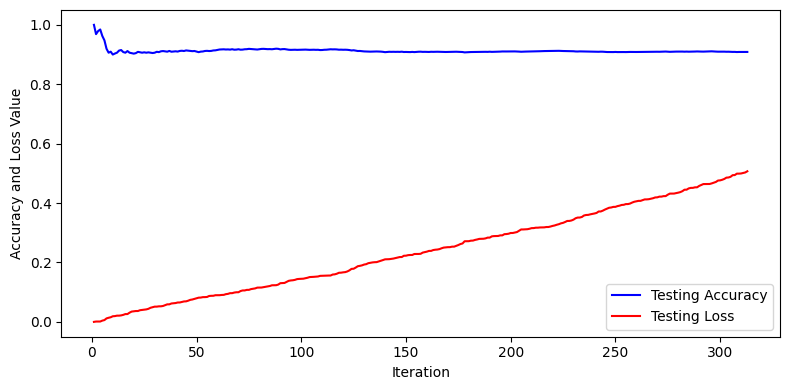

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have two lists 'iteration_accuracy' and 'iteration_loss' containing the accuracy and loss values on each iteration, respectively.

iterations = range(1, len(iteration_accuracy) + 1)

# Initialize the figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

# Update the accuracy subplot
ax.plot(iterations, iteration_accuracy, label='Testing Accuracy', color='blue')
ax.set_xlabel("Iteration")
# ax.set_ylabel("Accuracy")
# ax.set_title("Accuracy and Loss on Each Iteration")

# Update the loss subplot
ax.plot(iterations, iteration_loss, label='Testing Loss', color='red')
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy and Loss Value")

# Add a legend to differentiate accuracy and loss lines
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Print the metrics
# print(f'Test Loss: {eval_loss:.4f}, Test Accuracy: {eval_acc:.4f}')
print(f'Test Accuracy: {acc:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test F1 Score: {f1:.4f}')

from sklearn.metrics import confusion_matrix

# y_pred and y_true are assumed to be numpy arrays or lists
confusion = confusion_matrix(true_labels, predictions)

# Print the confusion matrix
print(confusion)

              precision    recall  f1-score   support

      1 Star       0.92      0.93      0.93       948
      2 Star       0.84      0.84      0.84       335
      3 Star       0.87      0.83      0.85       528
      4 Star       0.85      0.83      0.84       810
      5 Star       0.94      0.95      0.95      2379

    accuracy                           0.91      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.91      0.91      0.91      5000

Confusion matrix:
 [[ 883   27   17    7   14]
 [  30  282   14    3    6]
 [  19   18  439   28   24]
 [  10    5   22  675   98]
 [  13    4   13   84 2265]]


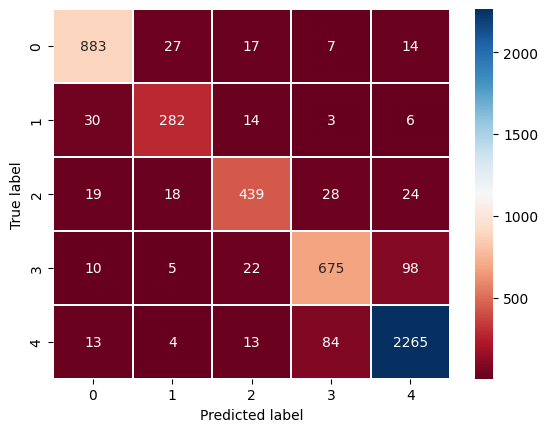

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


# Print classification report for ensemble model
target_names = ['1 Star', '2 Star', '3 Star','4 Star','5 Star']
print(classification_report(true_labels, predictions, target_names=target_names))

cm = confusion_matrix(true_labels, predictions)
print("Confusion matrix:\n", cm)
# corr, linewidths=.3, cmap="RdBu", annot=True, fmt=""
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='g', linewidths=.2, cmap='RdBu')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
